To be used

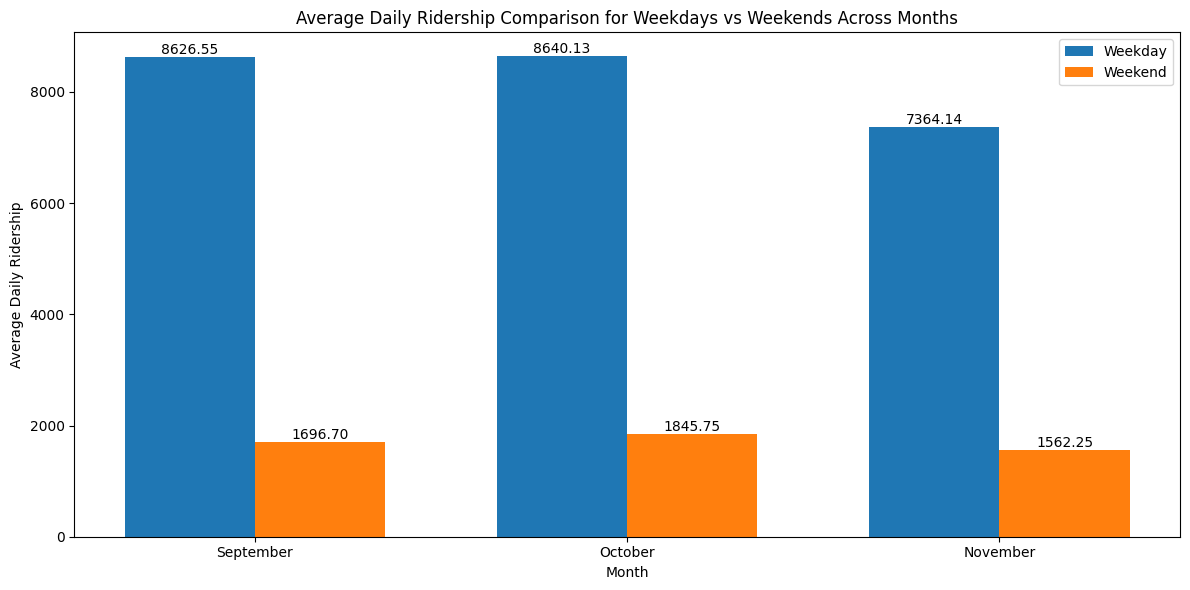

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('capmetro_UT.csv')

# Convert the 'timestamp' column to datetime format and extract month and day type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Weekday')
df['month'] = df['timestamp'].dt.strftime('%B')  # Extract month name

# Group the data by 'month', 'day_type', and 'timestamp' to get daily totals
daily_data = df.groupby(['month', 'day_type', df['timestamp'].dt.date])[['boarding', 'alighting']].sum().reset_index()

# Calculate total ridership per day
daily_data['total_ridership'] = daily_data['boarding'] + daily_data['alighting']

# Calculate average daily ridership by month and day type
monthly_avg_ridership = daily_data.groupby(['month', 'day_type'])[['total_ridership']].mean().reset_index()

# Ensure months are in chronological order
months = pd.to_datetime(monthly_avg_ridership['month'], format='%B').dt.month_name().tolist()
months = sorted(set(months), key=lambda x: pd.to_datetime(x, format='%B').month)

# Define bar width and position index for the months
bar_width = 0.35
index = np.arange(len(months))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through 'Weekday' and 'Weekend' to plot each type
for i, day_type in enumerate(['Weekday', 'Weekend']):
    # Filter the data for the current day type and set month as the index
    monthly_ridership = monthly_avg_ridership[monthly_avg_ridership['day_type'] == day_type].set_index('month')['total_ridership']
    # Reindex to ensure all months are represented in the plot, fill missing months with 0
    monthly_ridership = monthly_ridership.reindex(months, fill_value=0)
    # Plot bars for the current day type
    bars = ax.bar(index + i * bar_width, monthly_ridership, bar_width, label=day_type)
    # Annotate each bar with the average value
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                ha='center', va='bottom')

# Set axis labels, title, and x-tick positions and labels
ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Ridership')
ax.set_title('Average Daily Ridership Comparison for Weekdays vs Weekends Across Months')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(months)
ax.legend()

# Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

From the above graph we see that the per day ridership is higher during weekdays and lower during weekends and this trend is followed throughout the months.

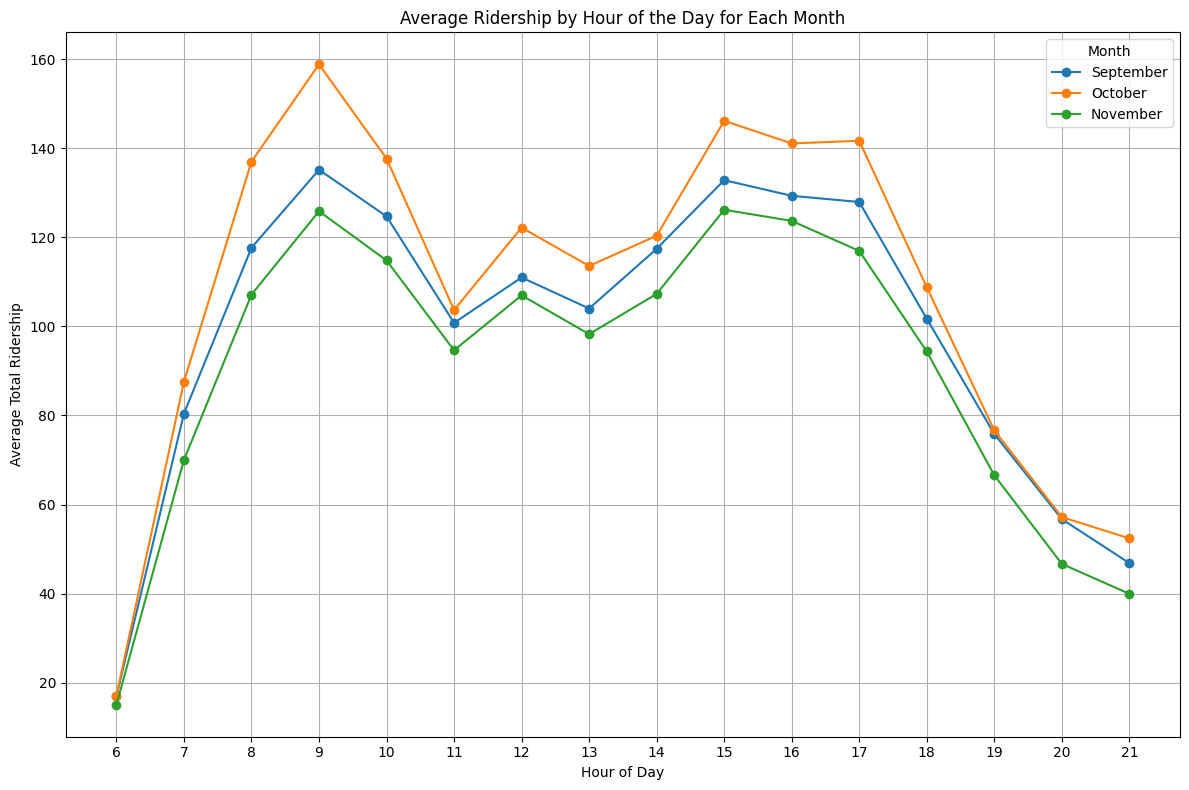

In [ ]:
# Reloading the data from the CSV file
df = pd.read_csv('capmetro_UT.csv')

# Convert 'timestamp' column to datetime format for easier manipulation
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract hour of the day and month from the 'timestamp' for analysis
df['hour_of_day'] = df['timestamp'].dt.hour  # Hour of the day (0 to 23)
df['month'] = df['timestamp'].dt.strftime('%B')  # Month name (e.g., 'January')

# Group data by month and hour, and calculate average ridership
# 'boarding' and 'alighting' are averaged, then summed to get 'total_ridership'
monthly_hourly_ridership = df.groupby(['month', 'hour_of_day'])[['boarding', 'alighting']].mean()
monthly_hourly_ridership['total_ridership'] = monthly_hourly_ridership['boarding'] + monthly_hourly_ridership['alighting']
monthly_hourly_ridership = monthly_hourly_ridership.reset_index()  # Reset index for plotting

# Create a plot with specific size for better visibility
fig, ax = plt.subplots(figsize=(12, 8))

# List of months in chronological order for accurate plotting
months = pd.to_datetime(monthly_hourly_ridership['month'], format='%B').dt.month_name().tolist()
months = sorted(set(months), key=lambda x: pd.to_datetime(x, format='%B').month)

# Plot average ridership by hour for each month
# Each line represents a different month
for month in months:
    monthly_data = monthly_hourly_ridership[monthly_hourly_ridership['month'] == month]
    ax.plot(monthly_data['hour_of_day'], monthly_data['total_ridership'], marker='o', label=month)

# Configure plot appearance
ax.set_xlabel('Hour of Day')  # X-axis label
ax.set_ylabel('Average Total Ridership')  # Y-axis label
ax.set_title('Average Ridership by Hour of the Day for Each Month')  # Plot title
ax.legend(title='Month')  # Legend to differentiate lines by month
ax.grid(True)  # Add grid lines for better readability
plt.xticks(range(6, 22))  # Show all hours of the day that are availale on the x-axis

# Adjust layout to fit everything nicely in the plot
plt.tight_layout()
plt.show()

This graph shows the fact that October has the highest amount of riders

The trend of riders is as follows:

1.   Around 9 it peaks as it is the time most of the folks travel to their offices and college
2.   It dips and peaks between 15-17 where people usually travel back and then dips as the time passes

The above trend is seen accross all months

In [ ]:
# Reloading the data
df = pd.read_csv('capmetro_UT.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour_of_day'] = df['timestamp'].dt.hour

# Calculate total ridership by hour of the day
hourly_data = df.groupby('hour_of_day').agg({
    'temperature': 'mean',
    'boarding': 'mean',
    'alighting': 'mean'
}).reset_index()
hourly_data['total_ridership'] = hourly_data['boarding'] + hourly_data['alighting']

# Calculate correlation between temperature and total ridership
correlation = hourly_data[['temperature', 'total_ridership']].corr().iloc[0, 1]
print(f"Correlation between temperature and total ridership: {correlation:.2f}")

Correlation between temperature and total ridership: 0.44


The correlation result for temperature and total ridership is positive and hence it states that more the temperature will be, more are the chances of a person taking a bus

(Visually shown below)

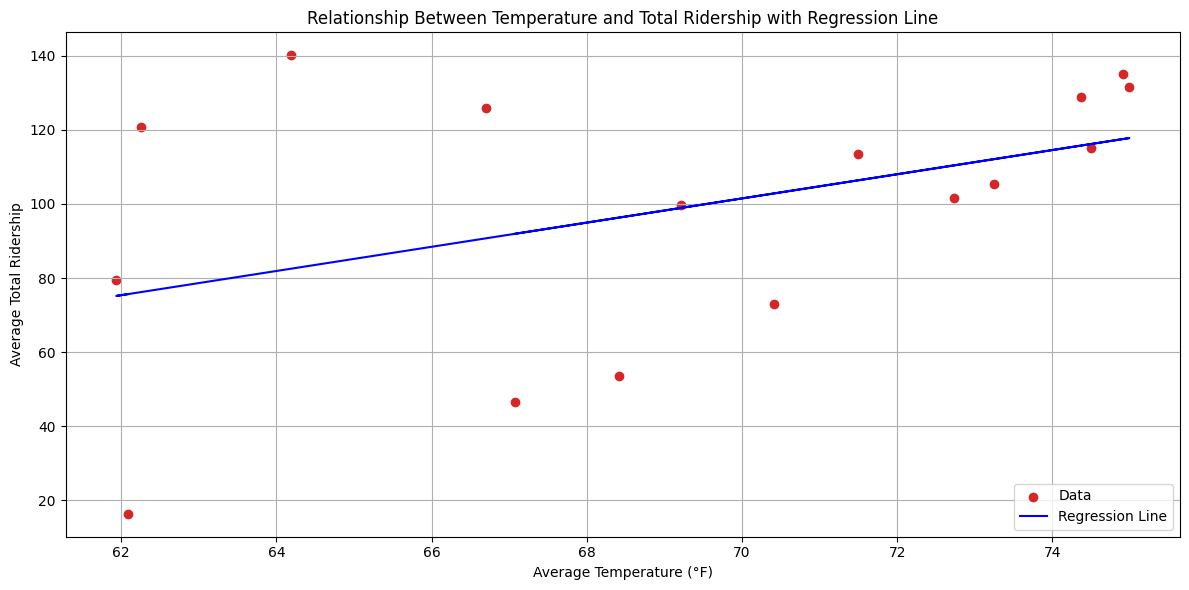

In [ ]:
# Scatter plot of temperature vs total ridership
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(hourly_data['temperature'], hourly_data['total_ridership'], color='tab:red', marker='o', label='Data')

# Perform linear regression
slope, intercept = np.polyfit(hourly_data['temperature'], hourly_data['total_ridership'], 1)
regression_line = slope * hourly_data['temperature'] + intercept

# Plot the regression line
ax.plot(hourly_data['temperature'], regression_line, color='blue', label='Regression Line')

# Add labels, title, and legend
ax.set_xlabel('Average Temperature (°F)')
ax.set_ylabel('Average Total Ridership')
ax.set_title('Relationship Between Temperature and Total Ridership with Regression Line')
ax.legend()

# Move the legend to the bottom right
ax.legend(loc='lower right')

# Add a grid and show the plot
ax.grid(True)
plt.tight_layout()
plt.show()

above graph gives a good visualization of the correlation result we found which states that as the temperature increases the ridership increases